In [0]:
#Import libraries
import pandas as pd
import numpy as np
import mlflow

from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score, precision_recall_curve, jaccard_score, f1_score

import matplotlib.pyplot as plt

In [0]:
#Read in model data
file_path = 'path_to_file'
rocket_model = mlflow.sklearn.load_model(model_uri = file_path)

In [0]:
#Print accuracy overall
print(rocket_model.score(X_test_tran,y_test))

In [0]:
#Obtain predictive probabilities
y_pred_prob = rocket_model.predict_proba(X_test_tran)
y_pred = rocket_model.predict(X_test_tran)

In [0]:
y_pred_prob[:,1].mean()

0.0005620088424299616

In [0]:
#PRCurve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

In [0]:
y_pred_prob

array([[1.00000000e+00, 3.74459921e-11],
       [9.99999998e-01, 2.28452220e-09],
       [9.99994556e-01, 5.44358015e-06],
       ...,
       [9.99999999e-01, 8.74963311e-10],
       [9.99997963e-01, 2.03681801e-06],
       [9.99999941e-01, 5.87628270e-08]])

In [0]:
df_res = pd.DataFrame()
df_res['precision'] = precision[:-1]
df_res['recall'] = recall[:-1]
df_res['thresholds'] = thresholds 
df_res['actual'] = y_test
df_res['pred'] = y_pred_prob[:,1]

In [0]:
df_res.display()

precision,recall,thresholds,actual,pred
0.02375952233889232,1.0,3.5417344235080566E-15,0,3.744599209584829E-11
0.023760500741228794,1.0,1.002994224413756E-14,0,2.2845222039262055E-9
0.02376147922414858,1.0,1.185226763904765E-14,1,5.443580147121848E-6
0.02376245778766164,1.0,1.9994051464643792E-14,0,1.2132858002687372E-8
0.023763436431777932,1.0,3.70500334000512E-14,0,1.4278284296933981E-9
0.023764415156507415,1.0,4.280491391654968E-14,0,4.3727045613593874E-7
0.023765393961860042,1.0,5.056753776327478E-14,0,6.649233596727353E-10
0.023766372847845788,1.0,5.2635320331646604E-14,0,2.2171892874852663E-8
0.023767351814474605,1.0,6.175794195789012E-14,0,1.8831490255167363E-10
0.02376833086175647,1.0,6.601751981576825E-14,0,4.867408107453614E-8


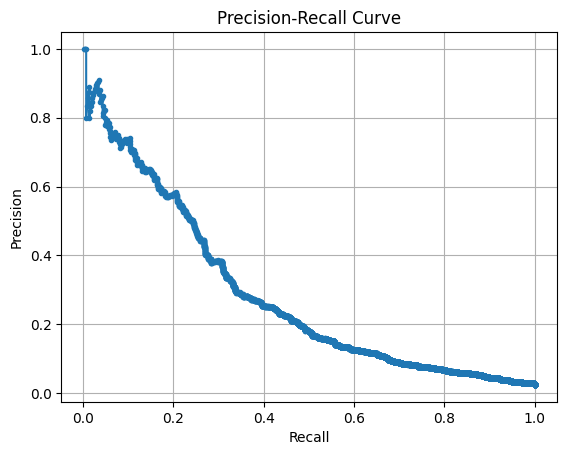

In [0]:
plt.figure()
plt.plot(df_res['recall'], df_res['precision'], marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [0]:
print(auc(df_res['recall'],df_res['precision']))

0.284992784192167


In [0]:
roc_auc_score(df_res['actual'], df_res['pred']) #0.8508871

0.8508871220297561

In [0]:
df_res.head()

,precision,recall,thresholds,actual,pred
0,0.023760,1.0,3.541734e-15,0,3.744599e-11
1,0.023761,1.0,1.002994e-14,0,2.284522e-09
2,0.023761,1.0,1.185227e-14,1,5.443580e-06
3,0.023762,1.0,1.999405e-14,0,1.213286e-08
4,0.023763,1.0,3.705003e-14,0,1.427828e-09


#### Tresholds - Auto

In [0]:
#Auto
unique_values, counts = np.unique(df_res['actual'], return_counts=True)
dict(zip(unique_values, counts))

{0: 23653, 1: 632}

In [0]:
#Auto
confusion_matrix(y_test,y_pred)

array([[23649,     4],
       [  617,    15]])

#### Thresholds - Manual

In [0]:
from numpy import argmax

bet = 2 #(0.5, 1, 2)
#fscore = 2 * (precision * recall) / (precision + recall) #F1
#fscore = (1 + bet*bet) * (precision * recall) / ((bet * bet * precision) + recall)
fscore = (1 + bet*bet) * (df_res['precision'] * df_res['recall']) / ((bet * bet * df_res['precision']) + df_res['recall'])

ix = argmax(fscore)

print(thresholds[ix]) #0.00012414130355391904

6.130138093987586e-06


In [0]:
fpr, tpr, thresholds = roc_curve(df_res['actual'], df_res['pred'])
J = tpr - fpr
ix = argmax(J)
b_thres = thresholds[ix]
print(b_thres)

def to_labels(pos_probs, threshold):
  return(pos_probs >= threshold).astype('int')

8.364937720297587e-08


In [0]:
def to_labels(pos_probs, threshold):
  return(pos_probs >= threshold).astype('int')

y_pred_man = to_labels(df_res['pred'],b_thres)

In [0]:
confusion_matrix(df_res['actual'],y_pred_man)

array([[18075,  5633],
       [  131,   446]])

In [0]:
unique_values, counts = np.unique(y_pred_man, return_counts=True)
dict(zip(unique_values, counts))

{0: 18206, 1: 6079}

In [0]:
#Manual
confusion_matrix(y_test,y_pred_man)

array([[18075,  5633],
       [  131,   446]])

In [0]:
df_res_demo_spark = spark.createDataFrame(df_res_demo)
df_res_demo_spark.write.mode("overwrite").saveAsTable("Falls_df_out")

In [0]:
#y_test_df = pd.DataFrame(y_test)
X_test_res = X_test.reset_index()
X_test_res = X_test_res.loc[:,'Pt_ID':'ethnicity']

X_test_res = X_test_res.drop(['Time','hxfall'],axis=1)
X_test_res.drop_duplicates(inplace=True)
X_test_res = X_test_res.drop(['Pt_ID'],axis=1)

X_test_res = X_test_res.reset_index()

df_res_demo = pd.concat([df_res_demo,X_test_res],axis=1)

In [0]:
df_res_demo.display()

In [0]:
roc_auc_score(df_res_demo['actual'], df_res_demo['pred_prob'])

0.8508871220297561

In [0]:
df_res_demo_full = spark.createDataFrame(df_res_demo)
df_res_demo_full.write.mode("overwrite").saveAsTable("Falls_df_out")